In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer

# Punto 1


Información del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unnamed: 0    18249 non-null  int64  
 1   date          18249 non-null  object 
 2   averageprice  18249 non-null  float64
 3   totalvolume   18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   totalbags     18249 non-null  float64
 8   smallbags     18249 non-null  float64
 9   largebags     18249 non-null  float64
 10  xlargebags    18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None

Primeros datos
   unnamed: 0        date  averageprice  totalvolume     4046       4225  \
0           0  20

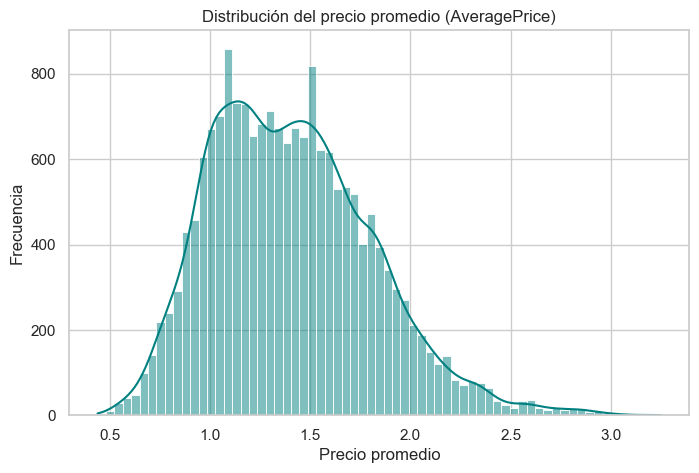

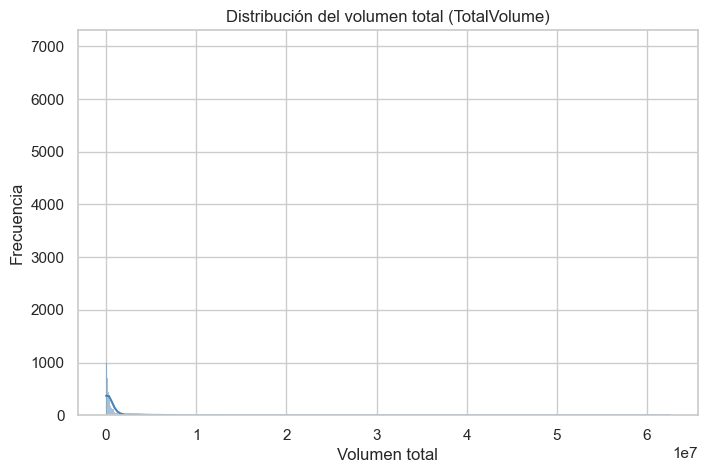

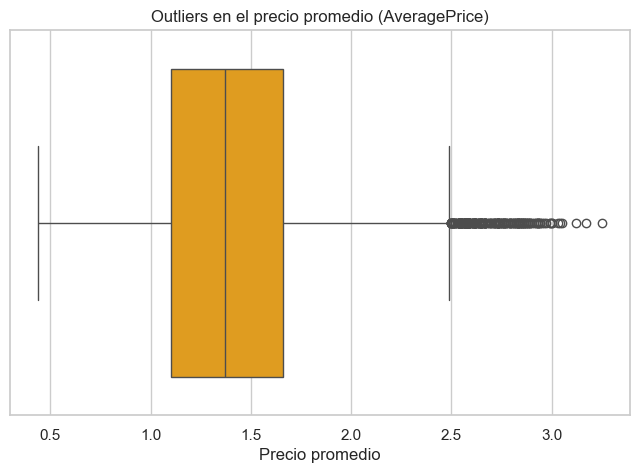

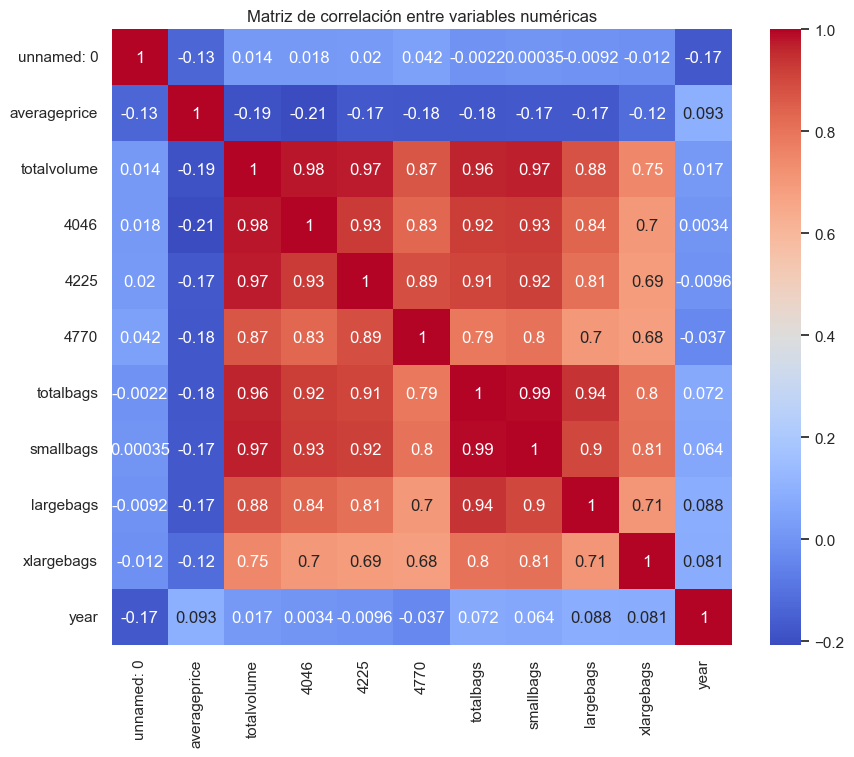

C:\Users\brian\AppData\Local\Temp\ipykernel_13220\3255925374.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y="averageprice", data=df, palette="pastel")


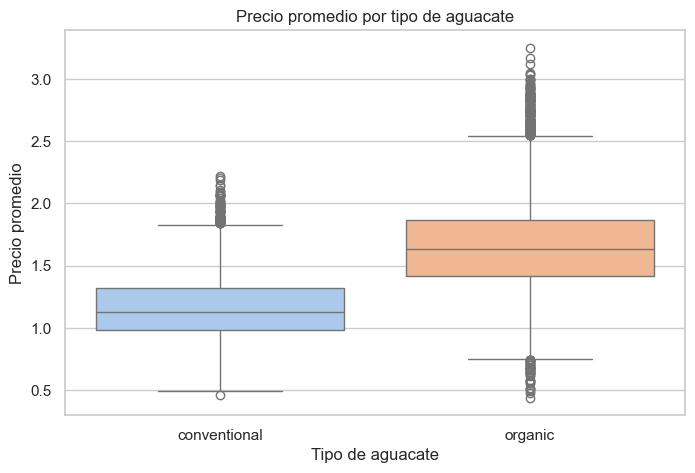

C:\Users\brian\AppData\Local\Temp\ipykernel_13220\3255925374.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")
C:\Users\brian\AppData\Local\Temp\ipykernel_13220\3255925374.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")


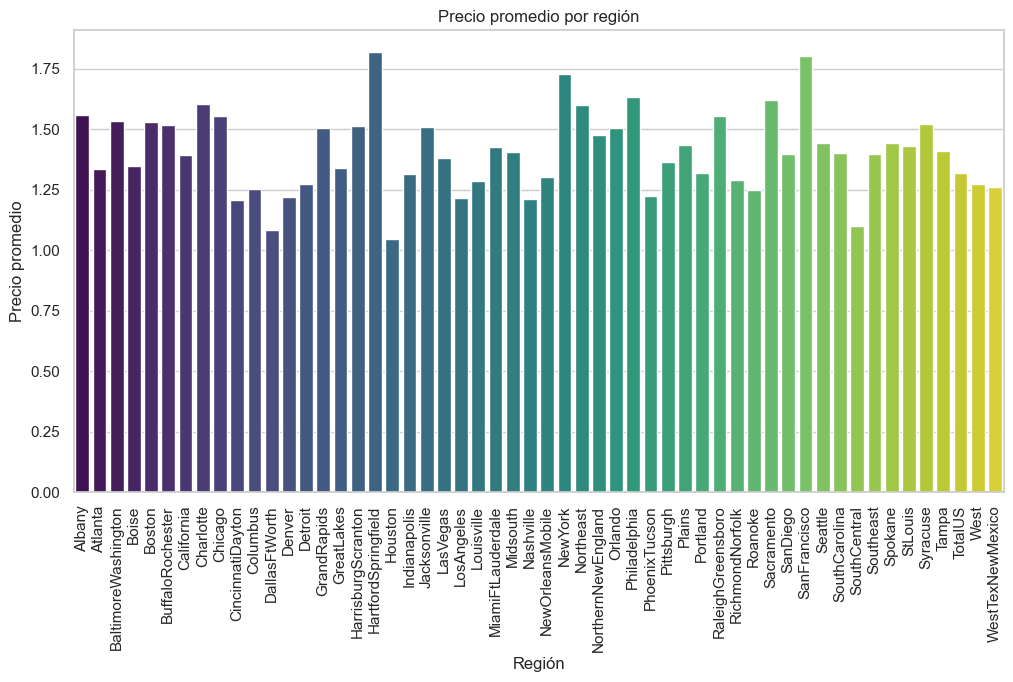

In [239]:
CSV_PATH = "avocado.csv"

df = pd.read_csv(CSV_PATH)
df.columns = [col.strip().lower() for col in df.columns]  # limpiar nombres de columnas

print("\nInformación del DataFrame")
print(df.info())
print("\nPrimeros datos")
print(df.head())
print("\nDescripción estadística")
print(df.describe())
print("\nNulos por columna")
print(df.isnull().sum())
print("\nduplicados por columna")
print(f"Filas duplicadas: {df.duplicated().sum()}")

sns.set_theme(style="whitegrid")


plt.figure(figsize=(8,5))
sns.histplot(df["averageprice"], kde=True, color="teal")
plt.title("Distribución del precio promedio (AveragePrice)")
plt.xlabel("Precio promedio")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df["totalvolume"], kde=True, color="steelblue")
plt.title("Distribución del volumen total (TotalVolume)")
plt.xlabel("Volumen total")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x=df["averageprice"], color="orange")
plt.title("Outliers en el precio promedio (AveragePrice)")
plt.xlabel("Precio promedio")
plt.show()


plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x="type", y="averageprice", data=df, palette="pastel")
plt.title("Precio promedio por tipo de aguacate")
plt.xlabel("Tipo de aguacate")
plt.ylabel("Precio promedio")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")
plt.xticks(rotation=90)
plt.title("Precio promedio por región")
plt.xlabel("Región")
plt.ylabel("Precio promedio")
plt.show()



# Punto 2

Tamaño original del dataset: (18249, 14)

Valores nulos por columna antes de limpiar:
unnamed: 0      0
date            0
averageprice    0
totalvolume     0
4046            0
4225            0
4770            0
totalbags       0
smallbags       0
largebags       0
xlargebags      0
type            0
year            0
region          0
dtype: int64

Valores nulos después de limpieza:
unnamed: 0      0
date            0
averageprice    0
totalvolume     0
4046            0
4225            0
4770            0
totalbags       0
smallbags       0
largebags       0
xlargebags      0
type            0
year            0
region          0
dtype: int64

Tamaño después de eliminar outliers: (15770, 17)

Columnas tras convertir categóricas:
Index(['unnamed: 0', 'date', 'averageprice', 'totalvolume', '4046', '4225',
       '4770', 'totalbags', 'smallbags', 'largebags', 'xlargebags', 'year',
       'year_num', 'month', 'week', 'type_organic', 'region_Atlanta',
       'region_BaltimoreWashington', '

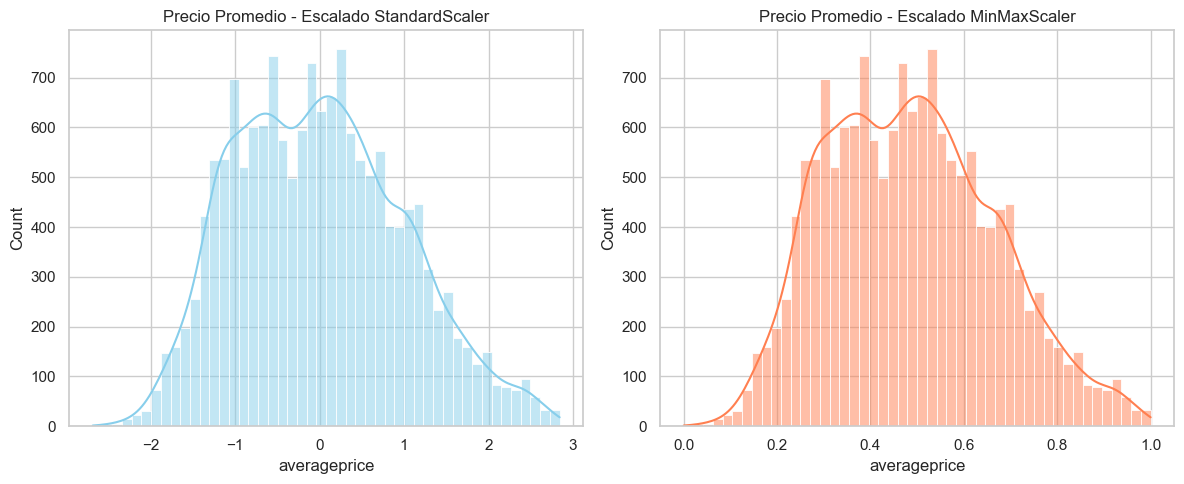

In [240]:

CSV_PATH = "avocado.csv"
df = pd.read_csv(CSV_PATH)
df.columns = [col.strip().lower() for col in df.columns]

print("Tamaño original del dataset:", df.shape)
print("\nValores nulos por columna antes de limpiar:")
print(df.isnull().sum())
df = df.dropna(subset=["averageprice", "totalvolume", "region", "type"])
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

print("\nValores nulos después de limpieza:")
print(df.isnull().sum())

df["date"] = pd.to_datetime(df["date"])
df["year_num"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.isocalendar().week


def quitar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado
df = quitar_outliers(df, "averageprice")
df = quitar_outliers(df, "totalvolume")

print("\nTamaño después de eliminar outliers:", df.shape)
df = pd.get_dummies(df, columns=["type", "region"], drop_first=True)

print("\nColumnas tras convertir categóricas:")
print(df.columns)


scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

num_cols = df.select_dtypes(include=[np.number]).columns
df_standard = df.copy()
df_minmax = df.copy()

df_standard[num_cols] = scaler_std.fit_transform(df_standard[num_cols])
df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])

print("\n Normalización completada.")


fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_standard["averageprice"], kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Precio Promedio - Escalado StandardScaler")

sns.histplot(df_minmax["averageprice"], kde=True, color="coral", ax=axes[1])
axes[1].set_title("Precio Promedio - Escalado MinMaxScaler")
plt.tight_layout()
plt.show()


# Punto 3


## Regresion

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

##### Regresion Lineal

In [242]:
df = pd.read_csv("avocado.csv")
df.head()


,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Preparación de datos para modelos de regresión

In [243]:
X = df_minmax.drop(columns=['averageprice', 'date', 'unnamed: 0'], errors='ignore')
y = df_minmax['averageprice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

modelo_lin = LinearRegression()
modelo_lin.fit(X_train, y_train)

y_pred_lin = modelo_lin.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("\nResultados del modelo de Regresión Lineal:")
print(f"Error cuadrático medio (MSE): {mse_lin:.4f}")
print(f"Coeficiente R²: {r2_lin:.4f}")

# Interpretación del R²
if r2_lin > 0.8:
    print("Excelente ajuste del modelo")
elif r2_lin > 0.6:
    print("✓ Buen ajuste del modelo")
elif r2_lin > 0.4:
    print("Ajuste moderado del modelo")
else:
    print("Ajuste pobre del modelo - considerar otras variables o modelos")



Datos de entrenamiento: (11039, 66), (11039,)
Datos de prueba: (4731, 66), (4731,)

Resultados del modelo de Regresión Lineal:
Error cuadrático medio (MSE): 0.0146
Coeficiente R²: 0.5600
Ajuste moderado del modelo


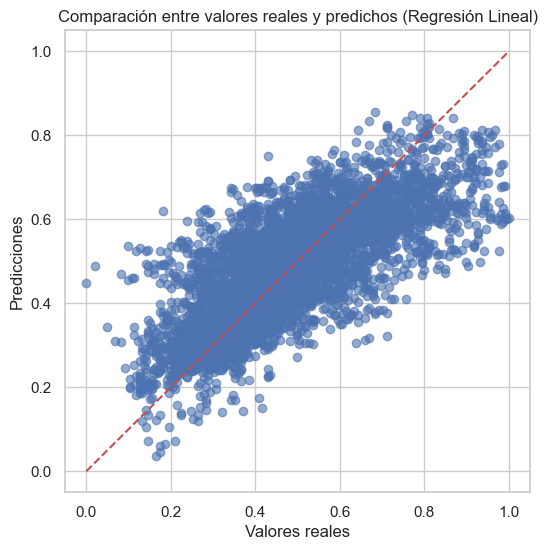

In [244]:
df_pred_lin = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lin,
    'Error': y_test - y_pred_lin
})

df_pred_lin.head(10)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos (Regresión Lineal)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

##### Random Forest Regressor

In [245]:
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
# Hacer predicciones con Random Forest
y_pred_rf = modelo_rf.predict(X_test)
# Evaluar el modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nResultados del modelo Random Forest:")
print(f"Error cuadrático medio (MSE): {mse_rf:.4f}")
print(f"Coeficiente R²: {r2_rf:.4f}")


Resultados del modelo Random Forest:
Error cuadrático medio (MSE): 0.0039
Coeficiente R²: 0.8828


In [246]:
df_pred_forest = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf,
    'Error': y_test - y_pred_rf
})

In [247]:
df_pred_forest.head(10)

,Actual,Predicted,Error
1942,0.336585,0.355854,-0.019268
11358,0.439024,0.365854,0.073171
16215,0.492683,0.493756,-0.001073
16638,0.517073,0.512000,0.005073
10929,0.458537,0.533902,-0.075366
1287,0.395122,0.400585,-0.005463
17088,0.863415,0.722098,0.141317
10414,0.673171,0.665220,0.007951
16204,0.809756,0.653220,0.156537
8844,0.326829,0.430878,-0.104049


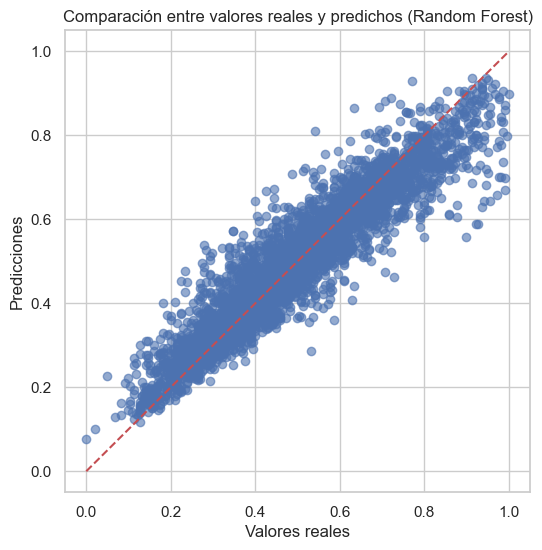

In [248]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

##### MLPRegressor

In [249]:
from sklearn.neural_network import MLPRegressor

In [250]:
modelo_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelo_mlp.fit(X_train, y_train)

y_pred_mlp = modelo_mlp.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\nResultados del modelo MLPRegressor (red neuronal):")
print(f"Error cuadrático medio (MSE): {mse_mlp:.4f}")
print(f"Coeficiente R²: {r2_mlp:.4f}")


Resultados del modelo MLPRegressor (red neuronal):
Error cuadrático medio (MSE): 0.0046
Coeficiente R²: 0.8604


In [251]:
# Comparar resultados
print("\nComparación de modelos:")
print(f"Regresión Lineal -> R²: {r2_lin:.4f} | MSE: {mse_lin:.4f}")
print(f"Random Forest -> R²: {r2_rf:.4f} | MSE: {mse_rf:.4f}")
print(f"MLP Regressor -> R²: {r2_mlp:.4f} | MSE: {mse_mlp:.4f}")


Comparación de modelos:
Regresión Lineal -> R²: 0.5600 | MSE: 0.0146
Random Forest -> R²: 0.8828 | MSE: 0.0039
MLP Regressor -> R²: 0.8604 | MSE: 0.0046


In [252]:
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Pred_RF': y_pred_rf,
    'Pred_MLP': y_pred_mlp
    })

In [253]:
df_pred.head(10)

,Actual,Pred_RF,Pred_MLP
1942,0.336585,0.355854,0.307552
11358,0.439024,0.365854,0.398726
16215,0.492683,0.493756,0.493486
16638,0.517073,0.512000,0.479404
10929,0.458537,0.533902,0.531318
1287,0.395122,0.400585,0.408664
17088,0.863415,0.722098,0.684593
10414,0.673171,0.665220,0.634311
16204,0.809756,0.653220,0.604275
8844,0.326829,0.430878,0.373893


## Clasificacion

### K-Nearest Neighbors Regressor (KNN)

Accuracy: 1.000
F1-score: 1.000
Precisión: 1.000
Recall: 1.000


C:\Users\brian\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


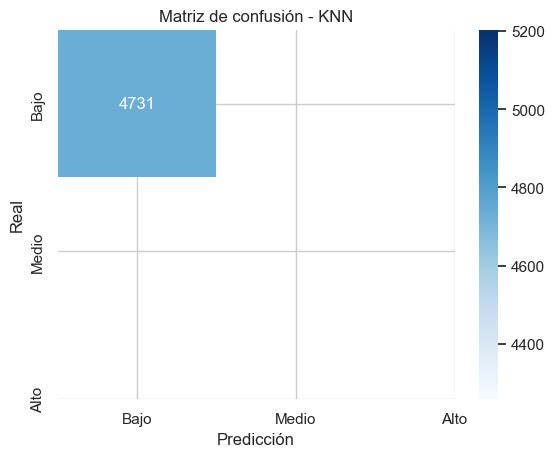

In [254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la variable categórica de precios
df_minmax['price_category'] = pd.cut(
    df_minmax['averageprice'],
    bins=[0, 1.2, 1.6, 3],
    labels=['Bajo', 'Medio', 'Alto'],
    include_lowest=True
)

# Eliminar filas donde no se pudo clasificar el precio
df_minmax = df_minmax.dropna(subset=['price_category'])

# Rellenar NaN solo en columnas numéricas
df_minmax[df_minmax.select_dtypes(include=['float64', 'int64']).columns] = \
    df_minmax.select_dtypes(include=['float64', 'int64']).fillna(0)

# Reasignar y_train y y_test con las categorías de precio
y_train = df_minmax.loc[X_train.index, 'price_category']
y_test = df_minmax.loc[X_test.index, 'price_category']

# Entrenar el modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Precisión: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap='Blues',
    xticklabels=['Bajo', 'Medio', 'Alto'],
    yticklabels=['Bajo', 'Medio', 'Alto']
)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - KNN')
plt.show()



### Arboles de decision 


Resultados Árbol de Decisión:
Accuracy: 1.000
F1-score: 1.000
Precisión: 1.000
Recall: 1.000

Reporte de Clasificación:
              precision    recall  f1-score   support

        Bajo       1.00      1.00      1.00      4731

    accuracy                           1.00      4731
   macro avg       1.00      1.00      1.00      4731
weighted avg       1.00      1.00      1.00      4731



C:\Users\brian\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


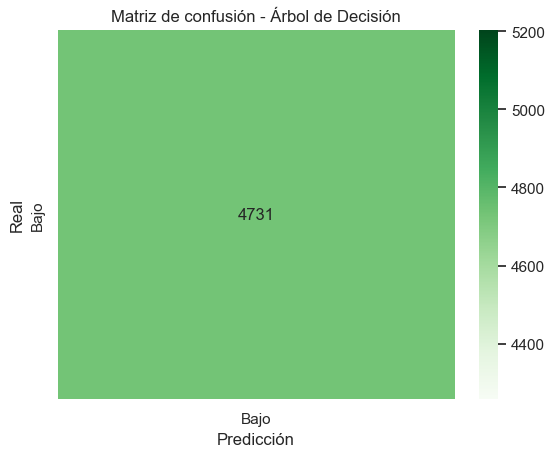

In [255]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Si y_train o y_test son categóricas tipo string, las codificamos
le_type = LabelEncoder()
y_train_encoded = le_type.fit_transform(y_train)
y_test_encoded = le_type.transform(y_test)

# Modelo de Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train_encoded)
y_pred_dt = model_dt.predict(X_test)

# Métricas
dt_accuracy = accuracy_score(y_test_encoded, y_pred_dt)
dt_f1 = f1_score(y_test_encoded, y_pred_dt, average='weighted')
dt_precision = precision_score(y_test_encoded, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test_encoded, y_pred_dt, average='weighted')

print("\nResultados Árbol de Decisión:")
print(f"Accuracy: {dt_accuracy:.3f}")
print(f"F1-score: {dt_f1:.3f}")
print(f"Precisión: {dt_precision:.3f}")
print(f"Recall: {dt_recall:.3f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test_encoded, y_pred_dt, target_names=le_type.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred_dt)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap='Greens',
    xticklabels=le_type.classes_,
    yticklabels=le_type.classes_
)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Árbol de Decisión')
plt.show()



## Agrupamiento (Clustering)

### K-Means

         unnamed: 0  averageprice  totalvolume      4046      4225      4770  \
Cluster                                                                        
0          0.535601      0.490418     0.181788  0.062005  0.076337  0.020910   
1          0.718961      0.445420     0.167777  0.065065  0.084055  0.035688   
2          0.210022      0.516425     0.156567  0.058544  0.071850  0.022555   

         totalbags  smallbags  largebags  xlargebags  ...  \
Cluster                                               ...   
0         0.100120   0.079257   0.039397    0.019301  ...   
1         0.063096   0.053792   0.020273    0.009864  ...   
2         0.072010   0.059545   0.025483    0.010436  ...   

         region_SouthCarolina  region_SouthCentral  region_Southeast  \
Cluster                                                                
0                    0.022091             0.011046          0.010800   
1                    0.021297             0.010554          0.010554   
2    

C:\Users\brian\AppData\Local\Temp\ipykernel_13220\572859498.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


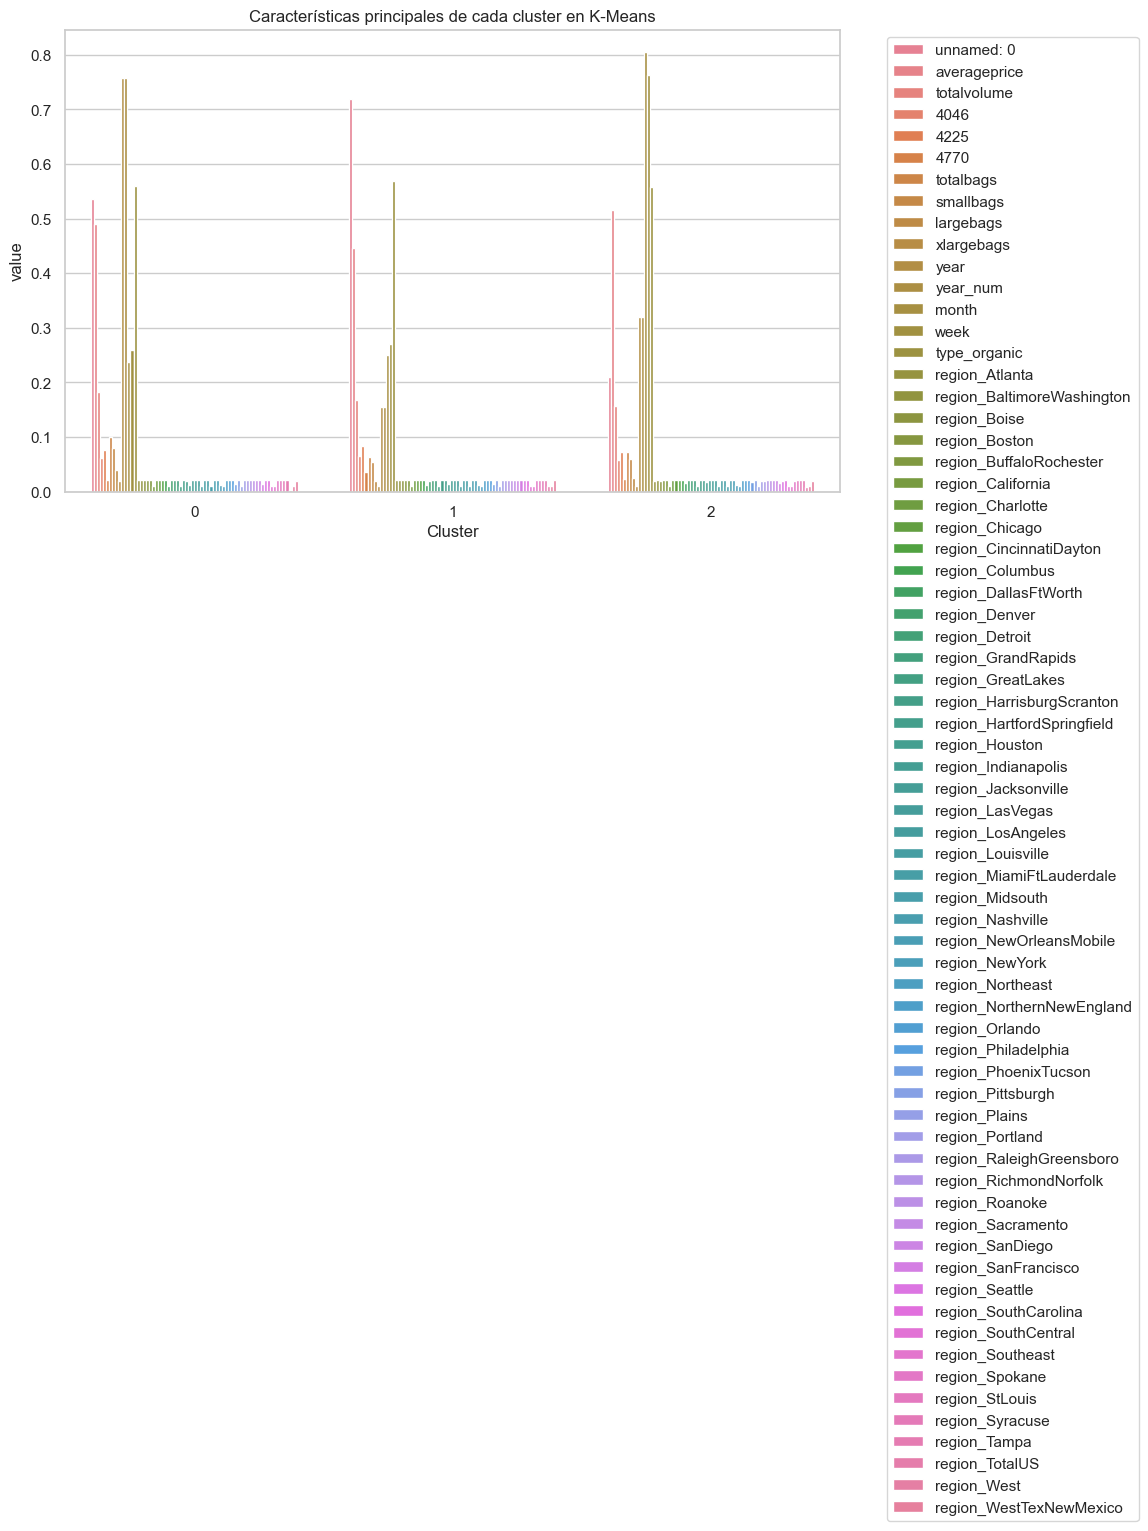

C:\Users\brian\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


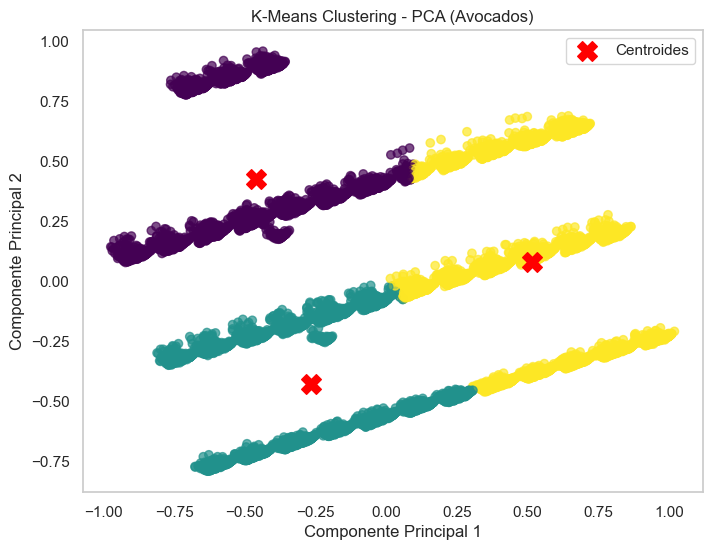

In [258]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_cluster = df_minmax.select_dtypes(include=['float64', 'int64'])

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_cluster)

# Agregar los clusters al DataFrame original
df_kmeans = df_minmax.copy()
df_kmeans['Cluster'] = kmeans.labels_

# Promedio de características numéricas por cluster
cluster_means_kmeans = df_kmeans.groupby('Cluster').mean(numeric_only=True)
print(cluster_means_kmeans)

# Gráfico de barras con las medias por cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cluster_means_kmeans.reset_index().melt(id_vars='Cluster'),
    x='Cluster',
    y='value',
    hue='variable'
)
plt.title("Características principales de cada cluster en K-Means")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# PCA para reducir a 2D y graficar los clusters
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)

# Centroides transformados
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("K-Means Clustering - PCA (Avocados)")
plt.legend()
plt.grid()
plt.show()

